In [4]:
#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#Import tables

corBetween = pd.read_csv("corBetween.csv")
answersTable = pd.read_csv("r_answers.csv")
questionsTable = pd.read_csv("r_questions.csv")

C:\Users\nroy0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
corBetween = corBetween.rename(index = str, columns={"UserId":" OwnerUserId", 'CreationDate': " CreationDate"})

In [5]:
answersTable=answersTable.sort_values([' OwnerUserId',' CreationDate']) #order by user
questionsTable=questionsTable.sort_values([' OwnerUserId',' CreationDate']) #order by user

In [6]:
def formatCreationDateColumn(table_provided):
    table = table_provided.copy()
    
   
    #Correcting format of dates in the table
    table[' CreationDate']=pd.to_datetime(table[' CreationDate'],errors="coerce")
    
    #remove lines which could not be formatted to correct date format
    table=table.loc[~table[" CreationDate"].isnull()]
    
    return(table)

In [7]:
answersTable = formatCreationDateColumn(answersTable)
questionsTable = formatCreationDateColumn(questionsTable)

In [9]:
#Remove users who have less than 5 answers
def removeUsersWithFewAnswers(answersTable,summaryTableProbAccAnswer):
    nrQuestionsperUser = answersTable[" OwnerUserId"].value_counts()
    lessthan5users=nrQuestionsperUser[nrQuestionsperUser<5].index
    nrUsersBefore=len(list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist())))
    filteredTable=summaryTableProbAccAnswer.loc[~summaryTableProbAccAnswer[" OwnerUserId"].isin(lessthan5users)]
    nrUsersAfter=len(list(set(filteredTable[" OwnerUserId"].tolist())))
    print(1-nrUsersAfter/nrUsersBefore,"% of the users were removed.")
    return(filteredTable)

In [30]:
RsummaryTableBetweenUser = removeUsersWithFewAnswers(answersTable,corBetween)

0.8431980167338085 % of the users were removed.


In [28]:
def gettingTableUserFirstActivity(answersTable_provided,questionsTable_provided):
    answersTable = answersTable_provided.copy()
    questionsTable = questionsTable_provided.copy()
    
    #"Normalization": 0 should correspond to time of first activity so that time is read as days after first activity
    #identify the first activity of users
    answersTable["FirstActivity"]=~answersTable[" OwnerUserId"].duplicated()
    questionsTable["FirstActivity"]=~questionsTable[" OwnerUserId"].duplicated()
    
    #obtaining first answer and first question of a user
    firstAnswers=answersTable.loc[answersTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]
    firstQuestions = questionsTable.loc[questionsTable["FirstActivity"]==True][[" OwnerUserId"," CreationDate"]]
    
    #and merge them into one table
    firstActTable=firstQuestions.merge(firstAnswers, left_on=" OwnerUserId", right_on=" OwnerUserId", how='outer')
    firstActTable.columns = [" OwnerUserId","FirstQuestion","FirstAnswer"]
    
    #obtain first activity (either answer or question)
    firstActTable["FirstActivity"]=firstActTable[["FirstQuestion","FirstAnswer"]].min(axis=1)
    
    return(firstActTable)

In [29]:
firstActTable = gettingTableUserFirstActivity(answersTable, questionsTable)
firstActTable

,OwnerUserId,FirstQuestion,FirstAnswer,FirstActivity
0,0,2008-09-17 03:39:16.913,2008-09-17 03:51:30.190,2008-09-17 03:39:16.913
1,277,2008-09-24 13:31:07.500,2011-01-18 17:53:30.627,2008-09-24 13:31:07.500
2,280,2009-12-11 01:18:47.903,NaT,2009-12-11 01:18:47.903
3,337,2014-10-16 17:33:39.987,2014-08-19 19:58:00.707,2014-08-19 19:58:00.707
4,357,2016-03-04 15:00:16.023,NaT,2016-03-04 15:00:16.023
5,404,2010-01-23 00:30:05.610,NaT,2010-01-23 00:30:05.610
6,422,2009-05-18 08:16:10.573,NaT,2009-05-18 08:16:10.573
7,445,2009-01-31 14:50:28.677,2009-02-04 15:12:59.503,2009-01-31 14:50:28.677
8,572,2009-01-07 13:27:28.407,NaT,2009-01-07 13:27:28.407
9,681,2012-04-06 21:21:34.377,2012-10-01 22:57:01.570,2012-04-06 21:21:34.377


In [51]:
def obtainsummaryTableBetweenUser(answersTable,questionsTable,firstActTable):
    
    #Adding first activity table to answerstable 
    summaryTableBetweenUser = answersTable.copy()
    summaryTableBetweenUser=summaryTableBetweenUser.merge(firstActTable,left_on = " OwnerUserId",right_on=" OwnerUserId")
    summaryTableBetweenUser[" CreationDate"] = pd.to_datetime(summaryTableBetweenUser[" CreationDate"])
    summaryTableBetweenUser["Present"]= max(summaryTableBetweenUser[" CreationDate"])
    #timestamp of answer compared to first activity of that user
    summaryTableBetweenUser["DifferenceNumerator"]=(summaryTableBetweenUser[" CreationDate"]-summaryTableBetweenUser["FirstActivity"])
    summaryTableBetweenUser["DifferenceDenominator"]=(summaryTableBetweenUser["Present"]-temp["FirstActivity"])
    
    summaryTableBetweenUser.DifferenceNumerator=summaryTableBetweenUser.DifferenceNumerator.dt.days # to obtain days with decimals
    summaryTableBetweenUser.DifferenceDenominator=summaryTableBetweenUser.DifferenceDenominator.dt.days
    summaryTableBetweenUser["NormTime"]=summaryTableBetweenUser["DifferenceNumerator"]/summaryTableBetweenUser["DifferenceDenominator"]
    
    return(summaryTableBetweenUser)

In [53]:
RsummaryTableBetweenUser = obtainsummaryTableBetweenUser(RsummaryTableBetweenUser, questionsTable, firstActTable)

In [54]:
def addZeroTimepoint(summaryTableProbAccAnswer_provided):
    summaryTableProbAccAnswer=summaryTableProbAccAnswer_provided.copy()
    #Add 0 to time 0
    usersWhoHaveZero=list(set(summaryTableProbAccAnswer[" OwnerUserId"][summaryTableProbAccAnswer["NormTime"]==0].tolist()))
    usersArtificialZero = list(set(summaryTableProbAccAnswer[" OwnerUserId"][~summaryTableProbAccAnswer[" OwnerUserId"].isin(usersWhoHaveZero)].tolist()))
    tempdfArtificialZero = pd.DataFrame(0, index=np.arange(len(usersArtificialZero)), columns=list(summaryTableProbAccAnswer.columns.values))
    tempdfArtificialZero[" OwnerUserId"]=usersArtificialZero
    tempdfArtificialZero[" OwnerUserId"]=tempdfArtificialZero[" OwnerUserId"].astype(np.int64) # make type correct
    summaryTableProbAccAnswer = summaryTableProbAccAnswer.append(tempdfArtificialZero, ignore_index=True)

    #reorder again
    summaryTableProbAccAnswer=summaryTableProbAccAnswer.sort_values([' OwnerUserId','NormTime']) #order by user
    return(summaryTableProbAccAnswer)

In [55]:
RsummaryTableBetweenUser = addZeroTimepoint(RsummaryTableBetweenUser)

In [68]:
RsummaryTableBetweenUser.loc[~RsummaryTableBetweenUser["DifferenceNumerator"]<0]

,Unnamed: 0,OwnerUserId,CreationDate,Betweenness,FirstQuestion,FirstAnswer,FirstActivity,Present,DifferenceNumerator,DifferenceDenominator,NormTime
0,0,0,2008-09-17 00:00:00,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,-1,3727,-0.000268
881577,0,0,0,0.000000,0,0,0,0,0,0,0.000000
1,1,0,2008-09-30 00:00:00,0.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,12,3727,0.003220
3,3,0,2009-01-25 00:00:00,10.500000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,129,3727,0.034612
21,21,0,2009-02-10 00:00:00,3896.273846,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,145,3727,0.038905
4,4,0,2009-02-20 00:00:00,22.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,155,3727,0.041588
5,5,0,2009-03-16 00:00:00,35.000000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,179,3727,0.048028
17,17,0,2009-04-09 00:00:00,1473.316667,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,203,3727,0.054467
7,7,0,2009-04-23 00:00:00,70.500000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,217,3727,0.058224
9,9,0,2009-05-06 00:00:00,88.500000,2008-09-17 03:39:16.913000,2008-09-17 03:51:30.190000,2008-09-17 03:39:16.913000,2018-12-02 00:00:00,230,3727,0.061712


In [59]:
import random
def plotEvolutionRandomUsers(RsummaryTableBetweenUser,language):
    r_users=RsummaryTableBetweenUser.loc[np.random.choice(RsummaryTableBetweenUser.index, 6)][" OwnerUserId"].tolist()
    plt.figure(figsize=(12,8))

    for i in range(0,6):
        user=r_users[i]
        plt.subplot(3,2,i+1)
        plt.xlabel("Days since first activity in "+language)
        plt.ylabel("Betweenness")
        plt.plot(RsummaryTableBetweenUser.loc[RsummaryTableBetweenUser[" OwnerUserId"]==user]["DifferenceNumerator"].tolist(),RsummaryTableBetweenUser.loc[RsummaryTableBetweenUser[" OwnerUserId"]==user]["Betweenness"].tolist())
    
    plt.tight_layout()
    plt.show()

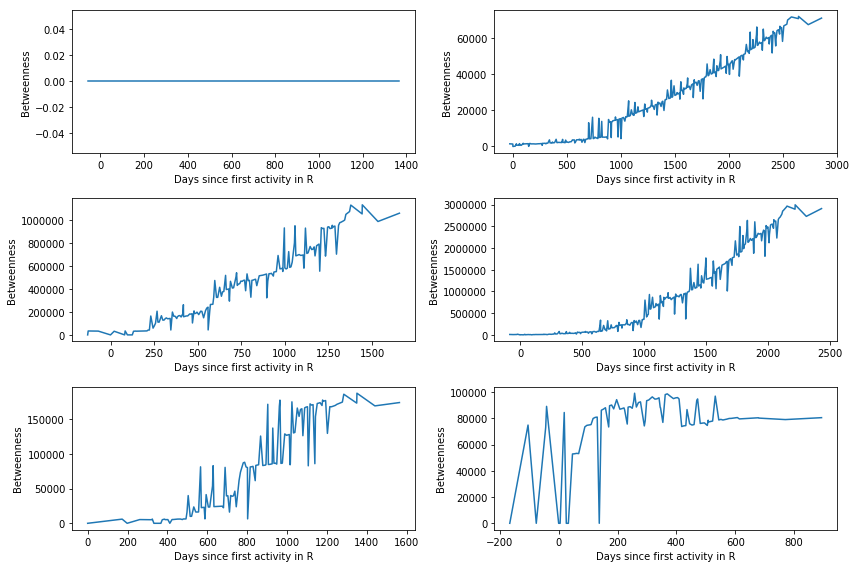

In [61]:
plotEvolutionRandomUsers(RsummaryTableBetweenUser,"R")


# Aggregate

In [62]:
#Import some modules
import numpy as np
from scipy.interpolate import interp1d

In [66]:
def aggregateIndividualLearningCurves(summaryTableProbAccAnswer,thresExpertise,threshUsers):
    #possible timepoints from 0 to the maximum span.
    x_all = np.linspace(0, max(summaryTableProbAccAnswer["DifferenceDenominator"]),num=5000, endpoint=True)
    
    #variable initialization
    sumProbs = np.zeros(len(x_all))
    nrUsers = np.zeros(len(x_all))
    users = list(set(summaryTableProbAccAnswer[" OwnerUserId"].tolist()))

    consUsers=0 #considered users

    #for each user:
    #linear interpolation - already checked that curve shape is similar to the ones obtained individually
    for user in users:
        xs_user=summaryTableProbAccAnswer["DifferenceNumerator"][summaryTableProbAccAnswer[" OwnerUserId"]==user].tolist()
        probs_user= summaryTableProbAccAnswer["Betweenness"][summaryTableProbAccAnswer[" OwnerUserId"]==user].tolist()
        
        #interpolation function for this user
        f1 = interp1d(xs_user,probs_user ,'linear')
        
        # only interpolated values are considered, meaning no extrapolated values
        subset_x_all=x_all[x_all<max(xs_user)]
        f1_int = f1(subset_x_all)
    
        
        # only users that are considered to achieve expertise will be taken into consideration for computing the learning curve
        if (min(probs_user[-5:])>thresExpertise):
            consUsers=consUsers+1
       
            #update probability sums at each time point with the interpolated probabilities for this user
            sumProbs[0:len(subset_x_all)]=sumProbs[0:len(subset_x_all)]+f1_int
            #update nr users 
            nrUsers[0:len(subset_x_all)] = nrUsers[0:len(subset_x_all)]+1

    
    #Remove timepoints which have less than a threshold number of users
    noUsersPos = np.where(nrUsers>threshUsers)
    sumProbs=sumProbs[noUsersPos]
    nrUsers=nrUsers[noUsersPos]
    x_all=x_all[noUsersPos]
    
    probs=sumProbs/nrUsers
    
    print((len(users)-consUsers)/len(users), " were not considered")
    print (consUsers, " were considered in total")
    
    return([x_all,probs])
def plotAvgCurve(x_all,probs,language):    
    plt.figure()
    plt.xlabel("Days since first activity in " + language)
    plt.ylabel("Betweenness")
    plt.plot(x_all, probs)
    plt.show()
    

0.0  were not considered
5060  were considered in total


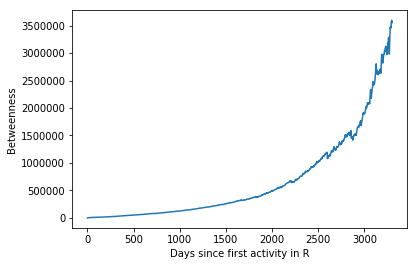

In [67]:
#R
[Rx_all,Rprobs]=aggregateIndividualLearningCurves(RsummaryTableBetweenUser,-0.1,100)
plotAvgCurve(Rx_all,Rprobs,"R")